<a href="https://colab.research.google.com/github/fitrahanif02/machine_learning_lesson/blob/main/homework8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for statistical data visualization
%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

Import dataset 

In [2]:
#connect to google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Exploratory data analysis

In [3]:
# A.DATA PREPROCESSING
# save filepath to variable for easier access
train_file_path = '../content/drive/My Drive/ML/8/train (1).csv'
test_file_path = '../content/drive/My Drive/ML/8/test (1).csv'
df = pd.read_csv(train_file_path)
test = pd.read_csv(test_file_path)
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
# view dimensions of dataset
df.shape

(2000, 21)

In [5]:
# view the column names of the dataframe

col_names = df.columns

col_names

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [6]:
# remove leading spaces from column names

df.columns = df.columns.str.strip()

In [7]:
# view column names again

df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

Explore missing values in variables

In [9]:
#battery_power: Total energy a battery can store in one time measured in mAh

#blue: Has bluetooth or not

#clock_speed: speed at which microprocessor executes instructions

#dual_sim: Has dual sim support or not

#fc: Front Camera mega pixels

#four_g: Has 4G or not

#int_memory: Internal Memory in Gigabytes

#m_dep: Mobile Depth in cm

#mobile_wt: Weight of mobile phone

#n_cores: Number of cores of processor

#pc: Primary Camera mega pixels

#px_height: Pixel Resolution Height

#px_width: Pixel Resolution Width

#ram: Random Access Memory in Mega Bytes

#sc_h: Screen Height of mobile in cm

#sc_w: Screen Width of mobile in cm

#talk_time: longest time that a single battery charge will last when you are

#three_g: Has 3G or not

#touch_screen: Has touch screen or not

#wifi: Has wifi or not

#price_range: This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).

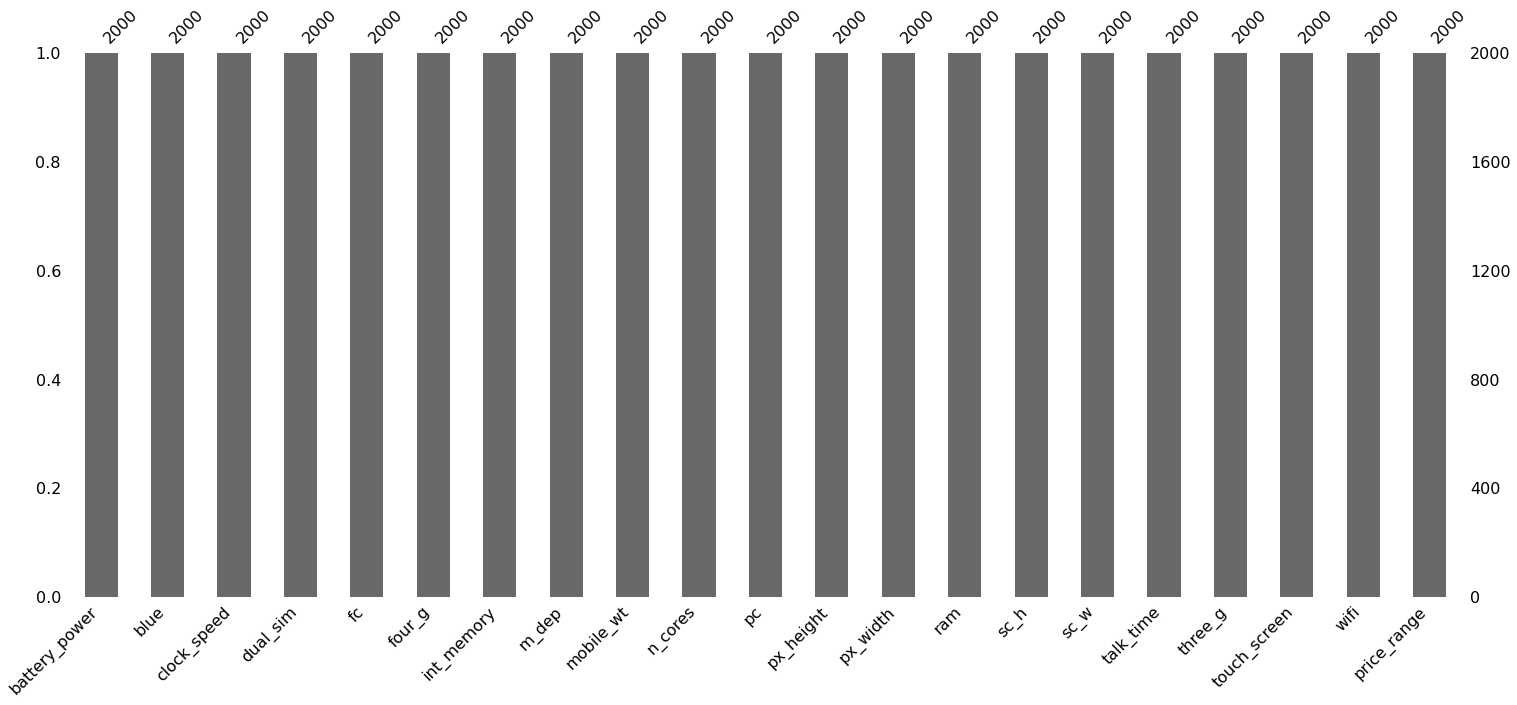

In [10]:
#cek missing values
import missingno as msno
import matplotlib.pyplot as plt
msno.bar(df)
plt.show()

In [11]:
# check for missing values in variables

df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

Outliers in numerical variables

In [12]:
# view summary statistics in numerical variables

round(df.describe(),2)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.00,2000.0,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.0,2000.00,2000.00
mean,1238.52,0.5,1.52,0.51,4.31,0.52,32.05,0.50,140.25,4.52,9.92,645.11,1251.52,2124.21,12.31,5.77,11.01,0.76,0.5,0.51,1.50
std,439.42,0.5,0.82,0.50,4.34,0.50,18.15,0.29,35.40,2.29,6.06,443.78,432.20,1084.73,4.21,4.36,5.46,0.43,0.5,0.50,1.12
min,501.00,0.0,0.50,0.00,0.00,0.00,2.00,0.10,80.00,1.00,0.00,0.00,500.00,256.00,5.00,0.00,2.00,0.00,0.0,0.00,0.00
25%,851.75,0.0,0.70,0.00,1.00,0.00,16.00,0.20,109.00,3.00,5.00,282.75,874.75,1207.50,9.00,2.00,6.00,1.00,0.0,0.00,0.75
50%,1226.00,0.0,1.50,1.00,3.00,1.00,32.00,0.50,141.00,4.00,10.00,564.00,1247.00,2146.50,12.00,5.00,11.00,1.00,1.0,1.00,1.50
75%,1615.25,1.0,2.20,1.00,7.00,1.00,48.00,0.80,170.00,7.00,15.00,947.25,1633.00,3064.50,16.00,9.00,16.00,1.00,1.0,1.00,2.25
max,1998.00,1.0,3.00,1.00,19.00,1.00,64.00,1.00,200.00,8.00,20.00,1960.00,1998.00,3998.00,19.00,18.00,20.00,1.00,1.0,1.00,3.00


Text(0, 0.5, 'm_dep')

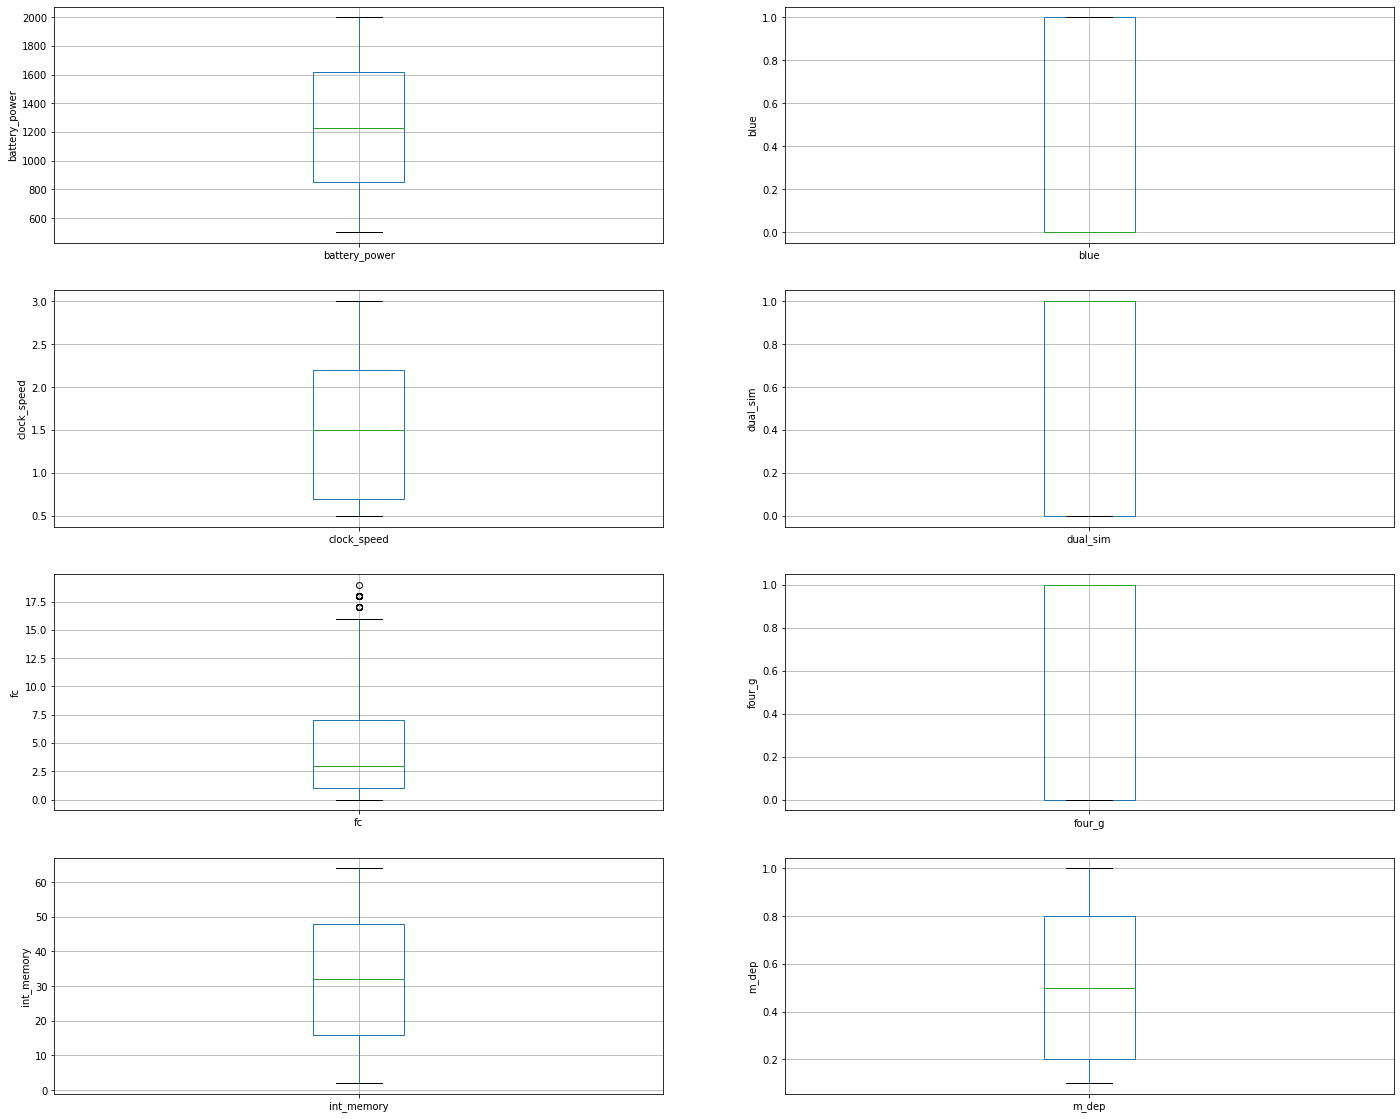

In [13]:
# draw boxplots to visualize outliers

plt.figure(figsize=(24,20))


plt.subplot(4, 2, 1)
fig = df.boxplot(column='battery_power')
fig.set_title('')
fig.set_ylabel('battery_power')


plt.subplot(4, 2, 2)
fig = df.boxplot(column='blue')
fig.set_title('')
fig.set_ylabel('blue')


plt.subplot(4, 2, 3)
fig = df.boxplot(column='clock_speed')
fig.set_title('')
fig.set_ylabel('clock_speed')


plt.subplot(4, 2, 4)
fig = df.boxplot(column='dual_sim')
fig.set_title('')
fig.set_ylabel('dual_sim')


plt.subplot(4, 2, 5)
fig = df.boxplot(column='fc')
fig.set_title('')
fig.set_ylabel('fc')


plt.subplot(4, 2, 6)
fig = df.boxplot(column='four_g')
fig.set_title('')
fig.set_ylabel('four_g')


plt.subplot(4, 2, 7)
fig = df.boxplot(column='int_memory')
fig.set_title('')
fig.set_ylabel('int_memory')


plt.subplot(4, 2, 8)
fig = df.boxplot(column='m_dep')
fig.set_title('')
fig.set_ylabel('m_dep')

Text(0, 0.5, 'Number of pulsar stars')

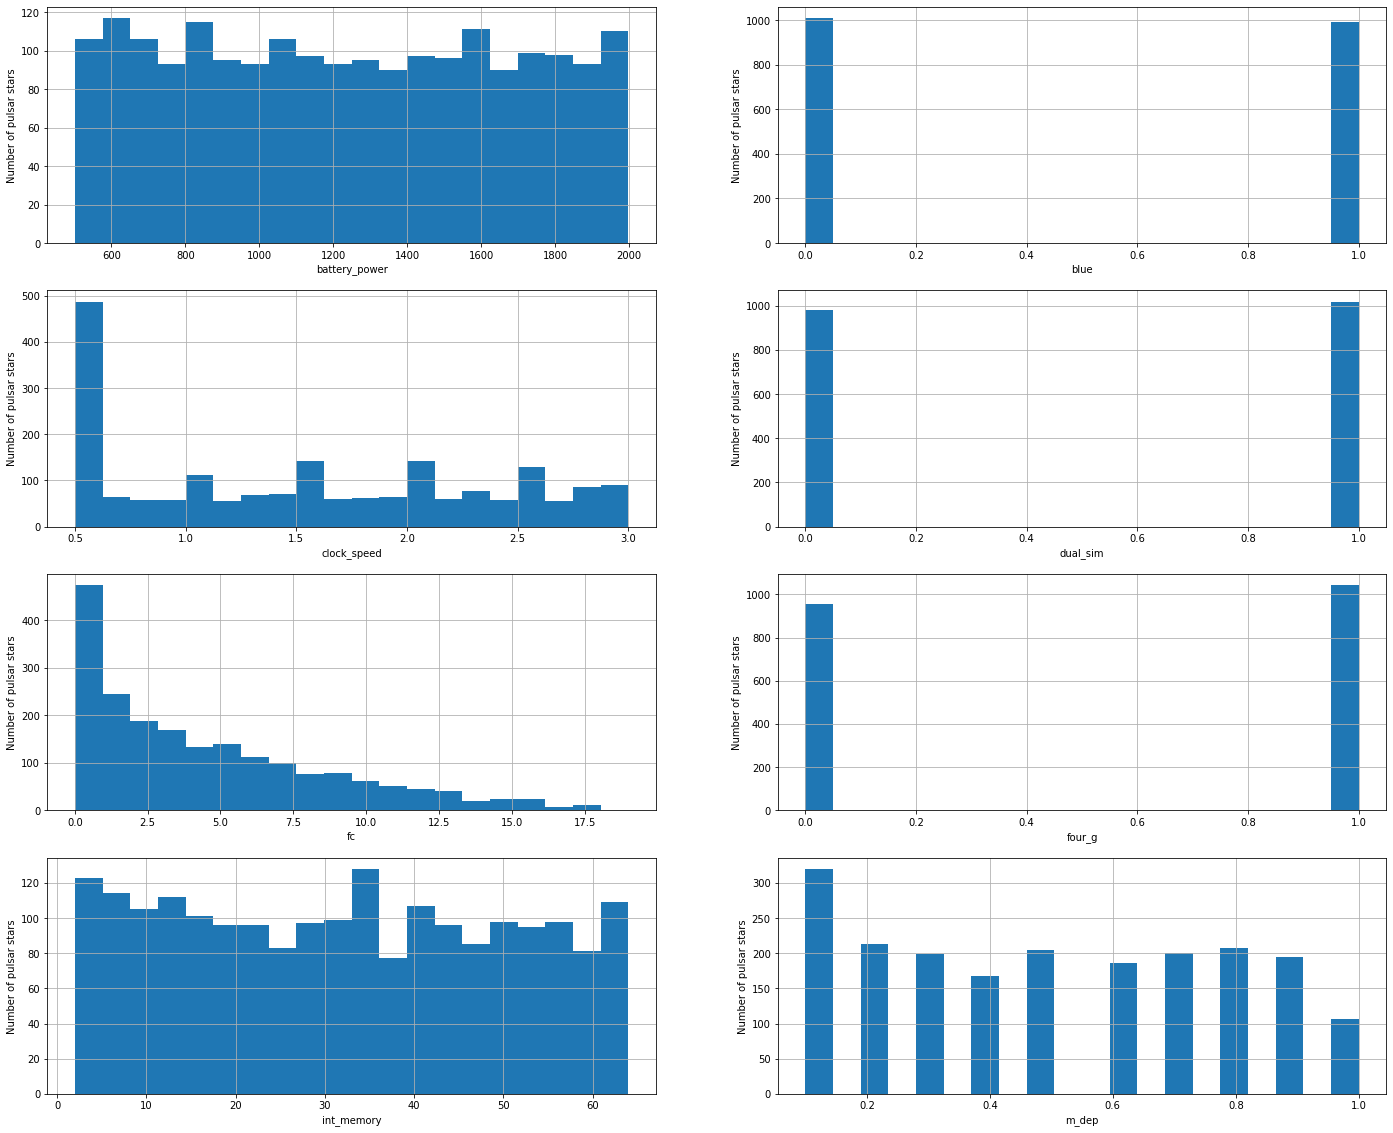

In [14]:
# plot histogram to check distribution


plt.figure(figsize=(24,20))


plt.subplot(4, 2, 1)
fig = df['battery_power'].hist(bins=20)
fig.set_xlabel('battery_power')
fig.set_ylabel('Number of pulsar stars')


plt.subplot(4, 2, 2)
fig = df['blue'].hist(bins=20)
fig.set_xlabel('blue')
fig.set_ylabel('Number of pulsar stars')


plt.subplot(4, 2, 3)
fig = df['clock_speed'].hist(bins=20)
fig.set_xlabel('clock_speed')
fig.set_ylabel('Number of pulsar stars')



plt.subplot(4, 2, 4)
fig = df['dual_sim'].hist(bins=20)
fig.set_xlabel('dual_sim')
fig.set_ylabel('Number of pulsar stars')



plt.subplot(4, 2, 5)
fig = df['fc'].hist(bins=20)
fig.set_xlabel('fc')
fig.set_ylabel('Number of pulsar stars')



plt.subplot(4, 2, 6)
fig = df['four_g'].hist(bins=20)
fig.set_xlabel('four_g')
fig.set_ylabel('Number of pulsar stars')



plt.subplot(4, 2, 7)
fig = df['int_memory'].hist(bins=20)
fig.set_xlabel('int_memory')
fig.set_ylabel('Number of pulsar stars')


plt.subplot(4, 2, 8)
fig = df['m_dep'].hist(bins=20)
fig.set_xlabel('m_dep')
fig.set_ylabel('Number of pulsar stars')

Declare feature vector and target variable

In [15]:
X = df.drop(['price_range'], axis=1)

y = df['price_range']

In [16]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [17]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((1600, 20), (400, 20))

Feature Scaling 

In [18]:
cols = X_train.columns

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [20]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [21]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [22]:
X_train.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
count,1.600000e+03,1.600000e+03,1.600000e+03,1.600000e+03,1.600000e+03,1.600000e+03,1.600000e+03,1.600000e+03,1.600000e+03,1.600000e+03,1.600000e+03,1.600000e+03,1.600000e+03,1.600000e+03,1.600000e+03,1.600000e+03,1.600000e+03,1.600000e+03,1.600000e+03,1.600000e+03
mean,1.411371e-16,3.791412e-16,9.783840e-17,-6.383782e-18,5.828671e-17,9.291179e-17,3.805116e-17,-1.251776e-16,-2.088607e-16,1.174755e-16,-1.250389e-16,-9.509754e-17,2.033096e-17,6.071532e-18,-1.433575e-16,-4.701101e-17,3.302913e-17,2.201017e-16,-5.044576e-17,-5.134781e-18
std,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00
min,-1.655595e+00,-9.655916e-01,-1.270550e+00,-1.016384e+00,-9.806728e-01,-1.024039e+00,-1.640908e+00,-1.385736e+00,-1.679155e+00,-1.543255e+00,-1.618027e+00,-1.472020e+00,-1.754691e+00,-1.715463e+00,-1.750745e+00,-1.324225e+00,-1.642981e+00,-1.770414e+00,-9.863432e-01,-1.025320e+00
25%,-8.862986e-01,-9.655916e-01,-1.025418e+00,-1.016384e+00,-7.481137e-01,-1.024039e+00,-8.707546e-01,-1.039140e+00,-8.825717e-01,-6.634373e-01,-9.587853e-01,-8.120687e-01,-8.738259e-01,-8.473725e-01,-7.932363e-01,-8.690180e-01,-9.132232e-01,5.648395e-01,-9.863432e-01,-1.025320e+00
50%,-2.762820e-02,-9.655916e-01,-4.488981e-02,9.838799e-01,-2.829954e-01,9.765254e-01,-4.559032e-02,6.498686e-04,-6.401117e-04,-2.235286e-01,3.007792e-02,-1.745838e-01,-4.490796e-03,3.077776e-03,-7.510461e-02,-1.862080e-01,-1.026222e-03,5.648395e-01,-9.863432e-01,9.753048e-01
75%,8.502746e-01,1.035635e+00,9.356385e-01,9.838799e-01,6.472412e-01,9.765254e-01,8.895958e-01,1.040440e+00,8.528421e-01,1.096197e+00,8.541306e-01,6.768939e-01,8.763739e-01,8.203363e-01,8.824044e-01,7.242054e-01,9.111708e-01,5.648395e-01,1.013846e+00,9.753048e-01
max,1.731571e+00,1.035635e+00,1.793601e+00,9.838799e-01,3.437951e+00,9.765254e-01,1.769771e+00,1.733633e+00,1.734774e+00,1.536106e+00,1.678183e+00,2.931400e+00,1.699590e+00,1.758756e+00,1.600536e+00,2.772635e+00,1.640928e+00,5.648395e-01,1.013846e+00,9.753048e-01


Run SVM with default hyperparameters

In [23]:
# import SVC classifier
from sklearn.svm import SVC


# import metrics to compute accuracy
from sklearn.metrics import accuracy_score


# instantiate classifier with default hyperparameters
svc=SVC() 


# fit classifier to training set
svc.fit(X_train,y_train)


# make predictions on test set
y_pred=svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with default hyperparameters: 0.8900


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


In [24]:
# instantiate classifier with rbf kernel and C=100
svc=SVC(C=100.0) 


# fit classifier to training set
svc.fit(X_train,y_train)


# make predictions on test set
y_pred=svc.predict(X_test)

# compute and print accuracy score
print('Model accuracy score with rbf kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


Model accuracy score with rbf kernel and C=100.0 : 0.8900


In [25]:
# instantiate classifier with rbf kernel and C=1000
svc=SVC(C=1000.0) 


# fit classifier to training set
svc.fit(X_train,y_train)


# make predictions on test set
y_pred=svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with rbf kernel and C=1000.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


Model accuracy score with rbf kernel and C=1000.0 : 0.8900


Run SVM with linear kernel

In [26]:
# instantiate classifier with linear kernel and C=1.0
linear_svc=SVC(kernel='linear', C=1.0) 


# fit classifier to training set
linear_svc.fit(X_train,y_train)


# make predictions on test set
y_pred_test=linear_svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with linear kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score with linear kernel and C=1.0 : 0.9525


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


Run SVM with linear kernel and C=100.0

In [27]:
# instantiate classifier with linear kernel and C=100.0
linear_svc100=SVC(kernel='linear', C=100.0) 


# fit classifier to training set
linear_svc100.fit(X_train, y_train)


# make predictions on test set
y_pred=linear_svc100.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with linear kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


Model accuracy score with linear kernel and C=100.0 : 0.9575


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


In [28]:
y_pred_train = linear_svc.predict(X_train)

y_pred_train

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


array([0, 1, 3, ..., 3, 0, 1])

In [29]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.9806


Check for overfitting and underfitting

In [30]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(linear_svc.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(linear_svc.score(X_test, y_test)))

Training set score: 0.9806
Test set score: 0.9525


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


Compare model accuracy with null accuracy

In [31]:
# check class distribution in test set

y_test.value_counts()

3    114
2     99
0     95
1     92
Name: price_range, dtype: int64

In [32]:
# check null accuracy score

null_accuracy = (3306/(3306+274))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.9235


Run SVM with polynomial kernel 

In [33]:
# instantiate classifier with polynomial kernel and C=1.0
poly_svc=SVC(kernel='poly', C=1.0) 


# fit classifier to training set
poly_svc.fit(X_train,y_train)


# make predictions on test set
y_pred=poly_svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with polynomial kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


Model accuracy score with polynomial kernel and C=1.0 : 0.8025


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


Run SVM with sigmoid kernel

In [34]:
# instantiate classifier with sigmoid kernel and C=1.0
sigmoid_svc=SVC(kernel='sigmoid', C=1.0) 


# fit classifier to training set
sigmoid_svc.fit(X_train,y_train)


# make predictions on test set
y_pred=sigmoid_svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with sigmoid kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


Model accuracy score with sigmoid kernel and C=1.0 : 0.9150


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


Run SVM with sigmoid kernel and C=100.0

In [35]:
# instantiate classifier with sigmoid kernel and C=100.0
sigmoid_svc100=SVC(kernel='sigmoid', C=100.0) 


# fit classifier to training set
sigmoid_svc100.fit(X_train,y_train)


# make predictions on test set
y_pred=sigmoid_svc100.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with sigmoid kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


Model accuracy score with sigmoid kernel and C=100.0 : 0.8475


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


Confusion matrix 

In [36]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[ 93   2   0   0]
 [  3  86   3   0]
 [  0   5  89   5]
 [  0   0   1 113]]

True Positives(TP) =  93

True Negatives(TN) =  86

False Positives(FP) =  2

False Negatives(FN) =  3


Classification metrices

In [37]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97        95
           1       0.92      0.93      0.93        92
           2       0.96      0.90      0.93        99
           3       0.96      0.99      0.97       114

    accuracy                           0.95       400
   macro avg       0.95      0.95      0.95       400
weighted avg       0.95      0.95      0.95       400



In [38]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [39]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.9728


Classification error

In [40]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.0272


Precision

In [41]:
# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

Precision : 0.9789


recall

In [42]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.9688


In [43]:
true_positive_rate = TP / float(TP + FN)


print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 0.9688


In [44]:
false_positive_rate = FP / float(FP + TN)


print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.0227


Specificity

In [45]:
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.9773
